# Código para extraer de cada país europeo un anchor y obtener sus medidas asociadas

### Obtención de los Anchors para entrenamiento/test y validación

In [1]:
# Carga del dataset de anchors
import pandas as pd

dir = "../0_Datasets/"
df_anchors = pd.read_csv(dir + "Candidate-Landmarks/RIPE/ripe_anchors.csv")

df_anchors.head(5)

,id,type,hostname,fqdn,probe,is_ipv4_only,ip_v4,as_v4,ip_v6,as_v6,...,nic_handle,geometry_type,latitude,longitude,tlsa_record,is_disabled,date_live,date_decommissioned,hardware_version,geom
0,1,Anchor,fi-tmp-as29432,fi-tmp-as29432.anchors.atlas.ripe.net,6003,False,195.140.195.61,29432,2001:67c:2b0:3d:92b1:1cff:fe1a:9145,29432.0,...,TRE53-RIPE,Point,61.498151,23.761025,NaN,True,2013-02-03 16:09:44,2017-08-24 08:51:20,0,0101000020E6100000E26C848FD2C23740F53CC967C3BF...
1,3,Anchor,ch-zrh-as34288,ch-zrh-as34288.anchors.atlas.ripe.net,6005,False,46.234.32.16,34288,2001:4b20:c000::2:1,34288.0,...,NaN,Point,47.368650,8.539183,NaN,True,2013-02-10 09:54:53,2017-03-17 15:19:01,0,0101000020E6100000AB2688BA0F142140A656A9EA2FAF...
2,4,Anchor,it-trn-as12779,it-trn-as12779.anchors.atlas.ripe.net,6011,False,213.212.129.68,12779,2001:1418:10:a::,12779.0,...,ITGA1-RIPE,Point,45.091300,7.660600,NaN,True,2013-02-25 10:42:12,2017-11-16 09:19:07,0,0101000020E61000004DF38E5374A41E40F90FE9B7AF8B...
3,5,Anchor,cz-prg-as25192,cz-prg-as25192.anchors.atlas.ripe.net,6006,False,217.31.202.20,25192,2001:1488:ffff::20,25192.0,...,NaN,Point,50.075538,14.437800,NaN,True,2013-02-09 09:58:23,2017-05-02 12:47:29,0,0101000020E61000004B581B6327E02C400E8D823BAB09...
4,6,Anchor,fr-cdg-as2486,fr-cdg-as2486.anchors.atlas.ripe.net,6004,False,192.134.1.25,2486,2001:67c:217c:4::2,2486.0,...,NFC1-RIPE,Point,48.856614,2.352222,NaN,True,2013-02-04 16:30:51,2017-03-14 11:45:22,0,0101000020E6100000D87A2BB759D10240DBA50D87A56D...


In [2]:
# Cargamos el dataset de los ripe probes
df_probes = pd.read_csv(dir + "Candidate-Landmarks/RIPE/ripe_probes.csv")

df_probes.head(5)

,id,address_v4,address_v6,asn_v4,asn_v6,country_code,description,firmware_version,first_connected,is_anchor,...,prefix_v6,status_id,status_name,status_since,total_uptime,type,geometry_type,latitude,longitude,tags
0,1,45.138.229.91,2a10:3781:e22:1:220:4aff:fec8:23d7,206238.0,206238.0,NL,Robert #1 100/10 XS4All,4790,1.288368e+09,False,...,2a10:3780::/29,1,Connected,1.731371e+09,429257485,Probe,Point,52.3475,4.9275,"DSL, Home, NAT, Native IPv6, IPv6, system: V1,..."
1,2,NaN,NaN,1136.0,1136.0,GU,Zuidoost,4790,1.288385e+09,False,...,2a02:a400::/25,3,Abandoned,1.640572e+09,347389948,Probe,Point,42.6585,21.1575,"DSL, Home, system: V1, system: IPv4 Capable, s..."
2,3,77.174.76.85,2a02:a467:f500:1:220:4aff:fec8:2532,1136.0,1136.0,NL,Ανδρέας@Άμστερνταμ,4790,1.288373e+09,False,...,2a02:a400::/25,1,Connected,1.731396e+09,423847767,Probe,Point,52.3685,4.9375,"Home, NAT, system: V1, system: IPv4 Capable, s..."
3,4,83.163.50.165,2001:980:57a4:1:220:4aff:fec8:244a,3265.0,3265.0,NL,xs4all adsl 52/5 IPv6,4790,1.288599e+09,False,...,2001:980::/32,3,Abandoned,1.568319e+09,248928764,Probe,Point,52.3895,4.6375,"DSL, Home, system: V1, iwantbcp38compliancetes..."
4,5,83.163.239.181,2001:981:602b:1:220:4aff:fec8:2355,3265.0,3265.0,ES,NaN,4790,1.288600e+09,False,...,2001:980::/30,3,Abandoned,1.513672e+09,185731720,Probe,Point,36.8295,-2.4625,"Home, NAT, system: V1, system: IPv4 Capable, s..."


In [3]:
# Número de anchors
num_anchors = df_anchors.shape[0]
print("Número de anchors totales: ", num_anchors)

# Obtenemos aquellos con el campo is_disabled = False
df_anchors = df_anchors[df_anchors['is_disabled'] == False]

# Número de anchors
num_anchors = df_anchors.shape[0]
print("Número de anchors activos: ", num_anchors)

Número de anchors totales:  1341
Número de anchors activos:  955


In [4]:
# Número de probes
num_probes = df_probes.shape[0]
print("Número de probes totales: ", num_probes)

# Obtenemos aquellos con el campo status_name = Connected
df_probes = df_probes[df_probes['status_name'] == 'Connected']

# Número de probes
num_probes = df_probes.shape[0]
print("Número de probes activos: ", num_probes)

Número de probes totales:  52044
Número de probes activos:  13142


In [5]:
# Países europeos según la norma ISO 3166-1 alpha-2
european_countries = [
    {"AL": "Albania"}, {"AD": "Andorra"}, {"AT": "Austria"}, {"BE": "Belgium"},
    {"BA": "Bosnia and Herzegovina"}, {"BG": "Bulgaria"}, {"HR": "Croatia"}, {"CY": "Cyprus"},
    {"CZ": "Czech Republic"}, {"DK": "Denmark"}, {"EE": "Estonia"}, {"FI": "Finland"},
    {"FR": "France"}, {"DE": "Germany"}, {"GR": "Greece"}, {"HU": "Hungary"},
    {"IS": "Iceland"}, {"IE": "Ireland"}, {"IT": "Italy"}, {"XK": "Kosovo"},
    {"LV": "Latvia"}, {"LI": "Liechtenstein"}, {"LT": "Lithuania"}, {"LU": "Luxembourg"},
    {"MK": "North Macedonia"}, {"MT": "Malta"}, {"MD": "Moldova"}, {"MC": "Monaco"},
    {"ME": "Montenegro"}, {"NL": "Netherlands"}, {"NO": "Norway"}, {"PL": "Poland"},
    {"PT": "Portugal"}, {"RO": "Romania"}, {"RS": "Serbia"}, {"SK": "Slovakia"},
    {"SI": "Slovenia"}, {"ES": "Spain"}, {"SE": "Sweden"}, {"CH": "Switzerland"},
    {"VA": "Vatican City"}, {"SM": "San Marino"}, {"GB": "United Kingdom"}
]

# Filtrando por el campo country de anchors y según la lista de países europeos, se obtienen los anchors europeos
df_anchors_europe = df_anchors[df_anchors['country'].isin([list(e.keys())[0] for e in european_countries])]

# Número de anchors europeos
num_anchors_europe = df_anchors_europe.shape[0]
print("Número de anchors europeos: ", num_anchors_europe)

Número de anchors europeos:  484


In [6]:
# Filtrando por el campo country_code de probes y según la lista de países europeos, se obtienen los probes europeos
df_probes_europe = df_probes[df_probes['country_code'].isin([list(e.keys())[0] for e in european_countries])]

# Número de probes europeos
num_probes_europe = df_probes_europe.shape[0]
print("Número de probes europeos: ", num_probes_europe)

Número de probes europeos:  7718


In [7]:
# Nos quedamos con las columnas que nos interesan de los anchors
df_anchors_europe = df_anchors_europe[['id', 'ip_v4', 'country', 'latitude', 'longitude']]

# Añadimos la columna type con el valor 'anchor'
df_anchors_europe['type'] = 'anchor'

# Nos quedamos con las columnas que nos interesan de los probes
df_probes_europe = df_probes_europe[['id', 'address_v4', 'country_code', 'latitude', 'longitude']]
df_probes_europe = df_probes_europe.rename(columns={'address_v4': 'ip_v4', 'country_code': 'country'})

# Añadimos la columna type con el valor 'probe'
df_probes_europe['type'] = 'probe'

In [8]:
# Si hay probes con la misma ip que algún anchor, se eliminan
num_probes_europe = df_probes_europe.shape[0]
print("Número de probes europeos antes de eliminar los que son anchors: ", num_probes_europe)
df_probes_europe = df_probes_europe[~df_probes_europe['ip_v4'].isin(df_anchors_europe['ip_v4'])]
num_probes_europe = df_probes_europe.shape[0]
print("Número de probes europeos después de eliminar los que son anchors: ", num_probes_europe)

Número de probes europeos antes de eliminar los que son anchors:  7718
Número de probes europeos después de eliminar los que son anchors:  7316


In [9]:
# Concatenamos los dataframes de anchors y probes europeos
df_anchors_probes_europe = pd.concat([df_anchors_europe, df_probes_europe])
print("Número de elementos en el dataframe concatenado: ", df_anchors_probes_europe.shape[0])

df_anchors_probes_europe.head(5)

Número de elementos en el dataframe concatenado:  7800


,id,ip_v4,country,latitude,longitude,type
23,278,213.225.160.239,FR,48.583148,7.747882,anchor
26,282,145.220.0.55,NL,52.370216,4.895168,anchor
33,291,192.65.184.54,FR,46.232473,6.045897,anchor
38,303,213.190.96.41,IS,64.139664,-21.955246,anchor
47,314,185.42.136.158,SE,59.328930,18.064910,anchor


In [10]:
# Cargamos todas las medidas realizadas 
df_measurements = pd.read_csv(dir + "new_campaign_measurements.csv")

df_measurements.head(5)

,id,measure_id,monitor_id,landmark_id,landmark_type,dst_ip,ping_rtt1,ping_rtt2,ping_rtt3,ping_rtt4,ping_rtt5,ping_rtt_avg,ping_rtt_std,direct_distance_kms,init_time,end_time
0,139713,95.217.19.69_2024-11-27 13:31:04,monitor_5_Warsaw_PL,9404,ripe_anchor,95.217.19.69,43.396,43.285,43.153,43.413,43.361,43.3216,0.09509,934.999404,2024-11-27 13:31:04,2024-11-27 13:31:10
1,139714,95.217.19.69_2024-11-27 13:31:04,monitor_2_Frankfurt am Main_DE,9404,ripe_anchor,95.217.19.69,29.764,30.024,30.169,29.848,29.768,29.9146,0.15830,1530.246007,2024-11-27 13:31:04,2024-11-27 13:31:10
2,139715,95.217.19.69_2024-11-27 13:31:04,monitor_6_Milan_IT,9404,ripe_anchor,95.217.19.69,44.189,44.295,44.580,44.130,44.185,44.2758,0.16121,1954.678802,2024-11-27 13:31:04,2024-11-27 13:31:10
3,139716,95.217.19.69_2024-11-27 13:31:04,monitor_1_Madrid_ES,9404,ripe_anchor,95.217.19.69,58.439,58.898,58.747,58.634,58.173,58.5782,0.25197,2963.403860,2024-11-27 13:31:04,2024-11-27 13:31:10
4,139717,95.217.19.69_2024-11-27 13:31:04,monitor_3_Dublin_IE,9404,ripe_anchor,95.217.19.69,44.494,45.022,44.098,44.170,44.756,44.5080,0.34878,2031.641470,2024-11-27 13:31:04,2024-11-27 13:31:11


In [11]:
# Nos quedamos con las filas con landmark_type = ripe_anchor o ripe_probe
df_measurements = df_measurements[df_measurements['landmark_type'].isin(['ripe_anchor', 'ripe_probe'])]

# Agrupamos por dst_ip y contamos el número de medidas
df_measurements_grouped = df_measurements.groupby('dst_ip').size().reset_index(name='count')

# Ahora, según la columna ping_rtt_avg, contamos cuántas medidas tienen un valor = -1
df_measurements_grouped['failed_measures'] = df_measurements_grouped['dst_ip'].map(df_measurements[df_measurements['ping_rtt_avg'] == -1].groupby('dst_ip').size())

# Nos quedamos con aquellos dst_ip que tienen todas las medidas fallidas (counts = failed_measures)
df_measurements_grouped = df_measurements_grouped[df_measurements_grouped['count'] == df_measurements_grouped['failed_measures']]

# Obtenemos los dst_ip de las medidas fallidas
failed_dst_ip = df_measurements_grouped['dst_ip'].values

print("Número de dst_ip con todas las medidas fallidas: ", len(failed_dst_ip))

# Eliminar los anchors que han fallado en todas las medidas
print("Número de elementos en el dataframe concatenado antes de eliminar los anchors fallidos: ", df_anchors_probes_europe.shape[0])
df_anchors_probes_europe = df_anchors_probes_europe[~df_anchors_probes_europe['ip_v4'].isin(failed_dst_ip)]
print("Número de elementos en el dataframe concatenado después de eliminar los anchors fallidos: ", df_anchors_probes_europe.shape[0])

Número de dst_ip con todas las medidas fallidas:  1
Número de elementos en el dataframe concatenado antes de eliminar los anchors fallidos:  7800
Número de elementos en el dataframe concatenado después de eliminar los anchors fallidos:  7799


In [12]:
# Mostramos cuántos anchors hay por país
df_anchors_probes_europe['country'].value_counts()

country
DE    1875
FR    1050
NL     671
GB     611
IT     389
CH     362
CZ     321
ES     240
AT     237
SE     222
PL     197
BE     194
PT     180
FI     144
DK     122
NO     102
BG      98
GR      92
IE      89
RO      75
HU      57
SI      57
LU      49
RS      49
SK      46
LT      37
HR      36
LV      34
EE      33
AL      22
MD      21
BA      19
IS      15
CY      14
MT      10
ME       9
MK       8
LI       5
AD       4
SM       1
VA       1
MC       1
Name: count, dtype: int64

In [13]:
# De manera aleatoria, dividimos los anchors europeos en dos grupos
# Los países entre 3 y 5 anchors, se escoge 1 anchor
# Obtenemos los países con la condición de 3 a 5 anchors
df_anchors_probes_europe_3_5 = df_anchors_probes_europe[df_anchors_probes_europe['country'].isin(df_anchors_probes_europe['country'].value_counts()[(df_anchors_probes_europe['country'].value_counts() >= 3) & (df_anchors_probes_europe['country'].value_counts() <= 5)].index)]
# Por cada país anterior, se escoge un anchor de manera aleatoria
df_anchors_probes_europe_3_5 = df_anchors_probes_europe_3_5.groupby('country').apply(lambda x: x.sample(n=1))

# Los países entre 6 y 9 anchors, se escoge 2 anchors
# Obtenemos los países con la condición de 6 a 9 anchors
df_anchors_probes_europe_6_9 = df_anchors_probes_europe[df_anchors_probes_europe['country'].isin(df_anchors_probes_europe['country'].value_counts()[(df_anchors_probes_europe['country'].value_counts() >= 6) & (df_anchors_probes_europe['country'].value_counts() <= 9)].index)]
# Por cada país anterior, se escoge dos anchors de manera aleatoria
df_anchors_probes_europe_6_9 = df_anchors_probes_europe_6_9.groupby('country').apply(lambda x: x.sample(n=2))

# Los países entre 10 y 15 anchors, se escoge 3 anchors
# Obtenemos los países con la condición de 10 a 15 anchors
df_anchors_probes_europe_10_15 = df_anchors_probes_europe[df_anchors_probes_europe['country'].isin(df_anchors_probes_europe['country'].value_counts()[(df_anchors_probes_europe['country'].value_counts() >= 10) & (df_anchors_probes_europe['country'].value_counts() <= 15)].index)]
# Por cada país anterior, se escoge tres anchors de manera aleatoria
df_anchors_probes_europe_10_15 = df_anchors_probes_europe_10_15.groupby('country').apply(lambda x: x.sample(n=3))

# Los países entre 16 y 20 anchors, se escoge 4 anchors
# Obtenemos los países con la condición de 16 a 20 anchors
df_anchors_probes_europe_16_20 = df_anchors_probes_europe[df_anchors_probes_europe['country'].isin(df_anchors_probes_europe['country'].value_counts()[(df_anchors_probes_europe['country'].value_counts() >= 16) & (df_anchors_probes_europe['country'].value_counts() <= 20)].index)]
# Por cada país anterior, se escoge cuatro anchors de manera aleatoria
df_anchors_probes_europe_16_20 = df_anchors_probes_europe_16_20.groupby('country').apply(lambda x: x.sample(n=4))

# Los países entre 20 y 40 anchors, se escoge 5 anchors
# Obtenemos los países con la condición de 20 a 40 anchors
df_anchors_probes_europe_20_40 = df_anchors_probes_europe[df_anchors_probes_europe['country'].isin(df_anchors_probes_europe['country'].value_counts()[(df_anchors_probes_europe['country'].value_counts() >= 20) & (df_anchors_probes_europe['country'].value_counts() <= 40)].index)]
# Por cada país anterior, se escoge cinco anchors de manera aleatoria
df_anchors_probes_europe_20_40 = df_anchors_probes_europe_20_40.groupby('country').apply(lambda x: x.sample(n=5))

# Los países con más de 40 anchors, se escoge 10 anchors
# Obtenemos los países con la condición de más de 40 anchors
df_anchors_probes_europe_40 = df_anchors_probes_europe[df_anchors_probes_europe['country'].isin(df_anchors_probes_europe['country'].value_counts()[(df_anchors_probes_europe['country'].value_counts() > 40)].index)]
# Por cada país anterior, se escoge diez anchors de manera aleatoria
df_anchors_probes_europe_40 = df_anchors_probes_europe_40.groupby('country').apply(lambda x: x.sample(n=10))

# Número de anchors por grupo
print("Número de anchors en el grupo 3-5: ", df_anchors_probes_europe_3_5.shape[0])
print("Número de anchors en el grupo 6-9: ", df_anchors_probes_europe_6_9.shape[0])
print("Número de anchors en el grupo 10-15: ", df_anchors_probes_europe_10_15.shape[0])
print("Número de anchors en el grupo 16-20: ", df_anchors_probes_europe_16_20.shape[0])
print("Número de anchors en el grupo 20-40: ", df_anchors_probes_europe_20_40.shape[0])
print("Número de anchors en el grupo 40+: ", df_anchors_probes_europe_40.shape[0])

# Eliminamos del df df_anchors_probes_europe los anchors que ya han sido seleccionados
df_anchors_probes_europe = df_anchors_probes_europe[~df_anchors_probes_europe['ip_v4'].isin(df_anchors_probes_europe_3_5['ip_v4'])]
df_anchors_probes_europe = df_anchors_probes_europe[~df_anchors_probes_europe['ip_v4'].isin(df_anchors_probes_europe_6_9['ip_v4'])]
df_anchors_probes_europe = df_anchors_probes_europe[~df_anchors_probes_europe['ip_v4'].isin(df_anchors_probes_europe_10_15['ip_v4'])]
df_anchors_probes_europe = df_anchors_probes_europe[~df_anchors_probes_europe['ip_v4'].isin(df_anchors_probes_europe_16_20['ip_v4'])]
df_anchors_probes_europe = df_anchors_probes_europe[~df_anchors_probes_europe['ip_v4'].isin(df_anchors_probes_europe_20_40['ip_v4'])]
df_anchors_probes_europe = df_anchors_probes_europe[~df_anchors_probes_europe['ip_v4'].isin(df_anchors_probes_europe_40['ip_v4'])]

# Número de anchors restantes
num_anchors_probes_europe = df_anchors_probes_europe.shape[0]
print("Número de anchors restantes: ", num_anchors_probes_europe)

Número de anchors en el grupo 3-5:  2
Número de anchors en el grupo 6-9:  4
Número de anchors en el grupo 10-15:  9
Número de anchors en el grupo 16-20:  4
Número de anchors en el grupo 20-40:  30
Número de anchors en el grupo 40+:  250
Número de anchors restantes:  6482


C:\Users\ma.ortega\AppData\Local\Temp\ipykernel_1080\3755975491.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_anchors_probes_europe_3_5 = df_anchors_probes_europe_3_5.groupby('country').apply(lambda x: x.sample(n=1))
C:\Users\ma.ortega\AppData\Local\Temp\ipykernel_1080\3755975491.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_anchors_probes_europe_6_9 = df_anchors_probes_europe_6_9.groupby

In [14]:
# Combino todos los grupos de anchors europeos
df_anchors_probes_europe_validation = pd.concat([df_anchors_probes_europe_3_5, df_anchors_probes_europe_6_9, df_anchors_probes_europe_10_15, df_anchors_probes_europe_16_20, df_anchors_probes_europe_20_40, df_anchors_probes_europe_40])
print("Número de anchors_probes en el grupo de validación: ", df_anchors_probes_europe_validation.shape[0])

Número de anchors_probes en el grupo de validación:  299


In [15]:
# Número de anchors en el grupo de learning (restantes)
df_anchors_probes_europe_learning = df_anchors_probes_europe
print("Número de anchors_probes en el grupo de learning: ", df_anchors_probes_europe_learning.shape[0])

Número de anchors_probes en el grupo de learning:  6482


In [16]:
# Número de anchors totales
num_anchors_total = df_anchors_probes_europe_validation.shape[0] + df_anchors_probes_europe_learning.shape[0]
print("Número de anchors totales: ", num_anchors_total)

Número de anchors totales:  6781


### Obtención de mediciones asociadas a los Anchors/Probes

In [17]:
# Eliminamos todas las medidas asociadas a los anchors/probes que tienen todas las medidas fallidas
print("Número de elementos en el dataframe de medidas antes de eliminar las medidas fallidas: ", df_measurements.shape[0])
df_measurements = df_measurements[~df_measurements['dst_ip'].isin(failed_dst_ip)]
print("Número de elementos en el dataframe de medidas después de eliminar las medidas fallidas: ", df_measurements.shape[0])

Número de elementos en el dataframe de medidas antes de eliminar las medidas fallidas:  888974
Número de elementos en el dataframe de medidas después de eliminar las medidas fallidas:  888171


In [18]:
# Obtenemos las medidas asociadas a los anchors/probes que están en el grupo de validación
df_measurements_validation = df_measurements[df_measurements['dst_ip'].isin(df_anchors_probes_europe_validation['ip_v4'])]

# Obtenemos las medidas asociadas a los anchors/probes que están en el grupo de learning
df_measurements_learning = df_measurements[df_measurements['dst_ip'].isin(df_anchors_probes_europe_learning['ip_v4'])]

print("Número de medidas en el grupo de validación: ", df_measurements_validation.shape[0])
print("Número de medidas en el grupo de learning: ", df_measurements_learning.shape[0])

Número de medidas en el grupo de validación:  46368
Número de medidas en el grupo de learning:  841803


In [19]:
# Comprobamos que no haya medidas en ambos grupos
print("Número de medidas en ambos grupos: ", df_measurements_validation[df_measurements_validation['dst_ip'].isin(df_anchors_probes_europe_learning['ip_v4'])].shape[0])

Número de medidas en ambos grupos:  0


In [20]:
# Guardamos los dataframes en archivos csv
dir_cleanDatasets = dir + "CleanDatasets/"
dir_trainingTest = dir + "Learning-Datasets/"
dir_validation = dir + "Validation-Datasets/"
df_anchors_probes_europe_validation.to_csv(dir_validation + "new_anchors_probes_europe_validation.csv", index=False)
df_anchors_probes_europe_learning.to_csv(dir_trainingTest + "new_anchors_probes_europe_learning.csv", index=False)

df_measurements_validation.to_csv(dir_validation + "new_measurements_validation.csv", index=False)
df_measurements_learning.to_csv(dir_trainingTest + "new_measurements_learning.csv", index=False)

### Representación de los anchors del conjunto de entrenamiento/test y validación

In [21]:
# Anchors únicos en los datasets de entrenamiento y validación
unique_anchors_training = df_measurements_learning['dst_ip'].nunique()
unique_anchors_validation = df_measurements_validation['dst_ip'].nunique()

print("Número de anchors únicos en los datasets de entrenamiento: ", unique_anchors_training)
print("Número de anchors únicos en los datasets de validación: ", unique_anchors_validation)

Número de anchors únicos en los datasets de entrenamiento:  1053
Número de anchors únicos en los datasets de validación:  58


In [22]:
# Del dataset de anchors, extraemos los anchors de entrenamiento (los de validación ya se han extraído)
df_anchors_europe_training = df_anchors_europe[~df_anchors_europe['ip_v4'].isin(df_anchors_probes_europe_validation['ip_v4'])]
df_anchors_europe_training.head()

,id,ip_v4,country,latitude,longitude,type
23,278,213.225.160.239,FR,48.583148,7.747882,anchor
26,282,145.220.0.55,NL,52.370216,4.895168,anchor
33,291,192.65.184.54,FR,46.232473,6.045897,anchor
38,303,213.190.96.41,IS,64.139664,-21.955246,anchor
47,314,185.42.136.158,SE,59.328930,18.064910,anchor


In [23]:
# Usando folium, se muestra un mapa con los anchors de entrenamiento
import folium
from folium import plugins

# Coordenadas de los anchors
df_anchors_europe_training['latitude'] = df_anchors_europe_training['latitude'].astype(float)
df_anchors_europe_training['longitude'] = df_anchors_europe_training['longitude'].astype(float)

# Mapa
m = folium.Map(location=[51.1657, 10.4515], zoom_start=5)

# Añadimos los markers, de color verde
for i in range(0, df_anchors_europe_training.shape[0]):
    folium.Marker(
        location=[df_anchors_europe_training.iloc[i]['latitude'], df_anchors_europe_training.iloc[i]['longitude']],
        popup=df_anchors_europe_training.iloc[i]['ip_v4'],
        icon=folium.Icon(color='green')
    ).add_to(m)

m

C:\Users\ma.ortega\AppData\Local\Temp\ipykernel_1080\2196133490.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anchors_europe_training['latitude'] = df_anchors_europe_training['latitude'].astype(float)
C:\Users\ma.ortega\AppData\Local\Temp\ipykernel_1080\2196133490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anchors_europe_training['longitude'] = df_anchors_europe_training['longitude'].astype(float)


In [24]:
# Usando folium, se muestra un mapa con los anchors de validación
# Coordenadas de los anchors
df_anchors_probes_europe_validation['latitude'] = df_anchors_probes_europe_validation['latitude'].astype(float)
df_anchors_probes_europe_validation['longitude'] = df_anchors_probes_europe_validation['longitude'].astype(float)

# Mapa
m = folium.Map(location=[51.1657, 10.4515], zoom_start=5)

# Añadimos los markers, esta vez de color rojo
for i in range(0, df_anchors_probes_europe_validation.shape[0]):
    folium.Marker(
        location=[df_anchors_probes_europe_validation.iloc[i]['latitude'], df_anchors_probes_europe_validation.iloc[i]['longitude']],
        popup=df_anchors_probes_europe_validation.iloc[i]['ip_v4'],
        icon=folium.Icon(color='red')
    ).add_to(m)
    
m

In [25]:
# Representamos en un mapa los anchors de entrenamiento (verde) y validación (rojo)
import branca
# Mapa
m = folium.Map(location=[51.1657, 10.4515], zoom_start=5)

# Añadimos los markers de entrenamiento, de color verde
for i in range(0, df_anchors_europe_training.shape[0]):
    folium.Marker(
        location=[df_anchors_europe_training.iloc[i]['latitude'], df_anchors_europe_training.iloc[i]['longitude']],
        popup=df_anchors_europe_training.iloc[i]['ip_v4'],
        icon=folium.Icon(color='green')
    ).add_to(m)

# Añadimos los markers de validación, de color rojo
for i in range(0, df_anchors_probes_europe_validation.shape[0]):
    folium.Marker(
        location=[df_anchors_probes_europe_validation.iloc[i]['latitude'], df_anchors_probes_europe_validation.iloc[i]['longitude']],
        popup=df_anchors_probes_europe_validation.iloc[i]['ip_v4'],
        icon=folium.Icon(color='red')
    ).add_to(m)

# Insertamos en el mapa una leyenda
legend = '''
{% macro html(this, kwargs) %}
<div style="position: fixed;
        bottom: 50px; left: 50px; width: auto; height: auto;
        border:2px solid grey; z-index:9999; font-size:14px;
        background-color:white; opacity: 0.85;">
        &nbsp; <b>Legend - Distribución de Anchors por Europa</b> <br>
        &nbsp; <i class="fa fa-circle" style="color:green"></i> &nbsp; Entrenamiento: ''' + str(unique_anchors_training) + ''' &nbsp; <br>

        &nbsp; <i class="fa fa-circle" style="color:red"></i> &nbsp; Validación : ''' + str(unique_anchors_validation) + ''' &nbsp; <br>
</div>
{% endmacro %}
'''
frecuencia = branca.element.MacroElement()
frecuencia._template = branca.element.Template(legend)

# Añadimos el cuadro con la frecuencia de errores al mapa
m.get_root().add_child(frecuencia)

m

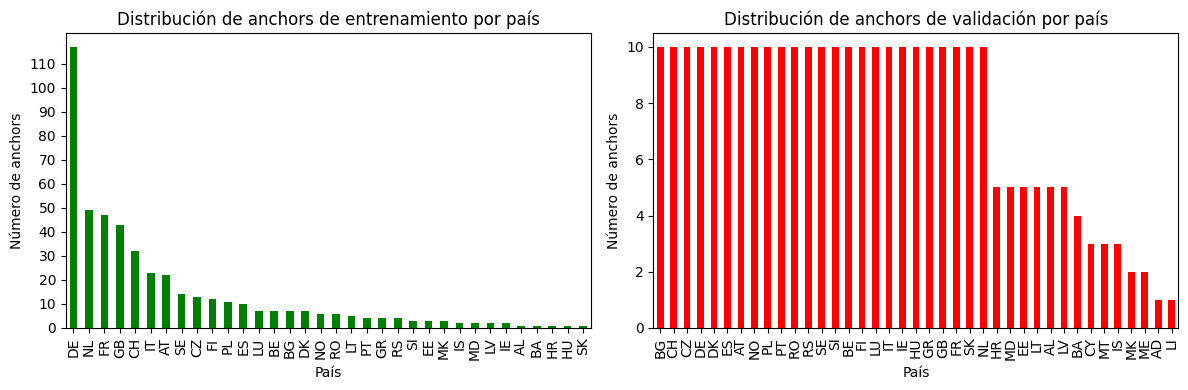

In [26]:
# Representación en un histograma de la distribución de anchors por país
# Se va a hacer un uso de un subplot para mostrar la distribución para los anchors de entrenamiento y validación
import matplotlib.pyplot as plt

# Distribución de anchors de entrenamiento y validación en dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Distribución de anchors de entrenamiento
df_anchors_europe_training['country'].value_counts().plot(kind='bar', color='green', ax=ax1)
ax1.set_title("Distribución de anchors de entrenamiento por país")
ax1.set_xlabel("País")
ax1.set_ylabel("Número de anchors")
# Aumentamos la frecuencia de los ticks en el eje y
ax1.set_yticks(range(0, 111, 10))

# Distribución de anchors de validación
df_anchors_probes_europe_validation['country'].value_counts().plot(kind='bar', color='red', ax=ax2)
ax2.set_title("Distribución de anchors de validación por país")
ax2.set_xlabel("País")
ax2.set_ylabel("Número de anchors")
# Aumentamos la frecuencia de los ticks en el eje y
ax2.set_yticks(range(0, 11, 2))

plt.tight_layout()
plt.show()